# CVXPY
https://www.cvxpy.org/index.html
# インストール
- `pip install cvxpy`
- `conda install -c conda-forge cvxpy`



In [1]:
import cvxpy as cvx
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification

# 線形計画問題（LP）
$$
\min_{x} c^\top x \mathrm{~s.t.~} Ax\le b
$$

In [2]:
np.random.seed(1)

m = 3
n = 2

A = np.random.randn(m, n)
b = np.random.randn(m)
c = np.random.randn(n)
x = cvx.Variable(n)

obj = cvx.Minimize(c.T @ x)
constraint = [A @ x <= b]
prob = cvx.Problem(obj, constraint)
prob.solve(verbose=True)

print("obj: ", prob.value)
print("x: ", x.value)

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 2, constraints m = 3
          nnz(P) + nnz(A) = 6
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -7.4877e+00   1.19e+01   9.40e-01   1.00e-01   4.80e-05s
 100   9.0731e-02   5.29e-06   8.86e-07   1.00e-01   1.00e-04s
plsh   9.0733e-02   4.21e-17   1.62e-16   -------- 

# 二次計画問題（QP）
## 最小二乗法
$$
\min_{x} \|Ax-b\|_2^2
$$

In [3]:
np.random.seed(1)

m = 10
n = 4

A = np.random.randn(m, n)
b = np.random.randn(m)
x = cvx.Variable(n)

obj = cvx.Minimize(cvx.sum_squares(A @ x - b))
# obj = cvx.Minimize(cvx.norm(A @ x - b, p=2)**2)
prob = cvx.Problem(obj)
prob.solve(verbose=True)

print("obj: ", prob.value)
print("x: ", x.value)

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 14, constraints m = 10
          nnz(P) + nnz(A) = 60
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   2.10e+00   4.19e+02   1.00e-01   8.88e-05s
  50   6.8125e+00   2.75e-09   5.65e-09   1.00e-01   2.07e-04s
plsh   6.8125e+00   1.93e-16   6.28e-16   ------

# 半正定値計画問題（SDP）
半正定値
- $X\succeq O ~\Leftrightarrow~ a^\top X a\ge 0, \forall a ~\Leftrightarrow~ \lambda_i \ge 0$

## 正定値射影
$$\min_{X\in \mathbb{R}^{n\times n}}\|A-X\|_F^2 \mathrm{~s.t.~} X\succeq O$$

In [4]:
np.random.seed(1)

n = 2

A = np.random.randn(n, n)
A = A + A.T
X = cvx.Variable((n,n), symmetric=True)

constraints = [X >> 0]
obj = cvx.Minimize(cvx.norm(A-X, "fro")**2)

prob = cvx.Problem(obj, constraints)
prob.solve(verbose=True)

print("obj: ", prob.value)
print("X: ")
print(X.value)

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 11, CG tol ~ 1/iter^(2.00)
eps = 1.00e-04, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 5, constraints m = 11
Cones:	soc vars: 8, soc blks: 2
	sd vars: 3, sd blks: 1
Setup time: 2.28e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.73e+01  1.24e+01  9.86e-01 -4.31e+01  2.97e+01  1.13e-14  1.88e-03 
    40| 1.07e-09  7.26e-10  4.98e-12  5.65e+00  5.65e+00  1.08e-15  2.25e-03 
-------------------------------------------------------------------

## 半正定値Coneの描画
$$
X=\left[\begin{array}{cc}
x&y\\
y&z
\end{array}\right]
$$
- $X\succeq O$ $\Leftrightarrow$ $x\ge0, z\ge0, xz\ge y^2$

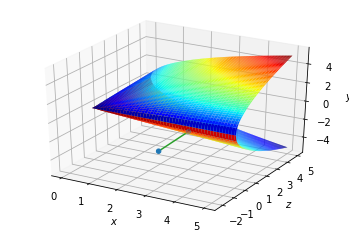

In [5]:
x = np.linspace(0,5,100)
z = np.linspace(0,5,100)
x, z = np.meshgrid(x, z)

y1 = +np.sqrt(x*z)
y2 = -np.sqrt(x*z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, z, y1, cmap='jet')
ax.plot_surface(x, z, y2, cmap='jet')
ax.scatter([A[0,0], X.value[0,0]], [A[1,1], X.value[1,1]], [A[0,1], X.value[0,1]])
ax.plot([A[0,0], X.value[0,0]], [A[1,1], X.value[1,1]], [A[0,1], X.value[0,1]])
ax.set_xlabel("$x$")
ax.set_ylabel("$z$")
ax.set_zlabel("$y$")
plt.savefig("sdcone.pdf")

# LASSO
$$
\min_{w,b} \sum_{i}(w^\top x_i + b - y_i)^2+\lambda\|w\|_1
$$

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 103, constraints m = 102
          nnz(P) + nnz(A) = 404
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -8.0000e+00   3.16e+01   2.53e+05   1.00e-01   1.15e-04s
  50   7.7634e+01   9.93e-05   4.01e-06   9.03e-03   2.21e-04s
plsh   7.7634e+01   5.56e-15   1.41e-13   ---

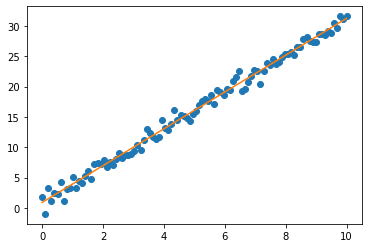

In [6]:
n = 100
x = np.linspace(0,10,n)
y = 3*x + 1 + np.random.randn(n)
lam = 1

w = cvx.Variable()
b = cvx.Variable()

obj = 0
for i in range(n):
    obj += (w*x[i]+b-y[i])**2
obj += lam * cvx.norm(w, p=1)    
obj = cvx.Minimize(obj)

prob = cvx.Problem(obj)
prob.solve(verbose=True)

plt.plot(x,y,"o")
plt.plot(x,x*w.value+b.value)
plt.savefig("lasso.pdf")

# SVM
$$
\min_{w,b} \frac{1}{2}\|w\|_2^2+C\sum_{i}\max\{0, 1 - y_i(w^\top x_i + b)\}
$$

$$
\begin{split}
\min_{w,b,\xi} ~&~ \frac{1}{2}\|w\|_2^2+C\sum_{i}\xi_i\\
\mathrm{s.t.} ~&~ \xi_i \ge 1 - y_i(w^\top x_i + b), \\
               ~&~ \xi_i\ge0
\end{split}
$$

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 103, constraints m = 200
          nnz(P) + nnz(A) = 502
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.3937e+03   1.89e+01   1.14e+01   1.00e-01   1.69e-04s
 200   2.7250e+00   4.82e-03   1.34e-03   1.00e-01   8.63e-04s
 400   2.7318e+00   2.60e-04   9.70e-04   1.0

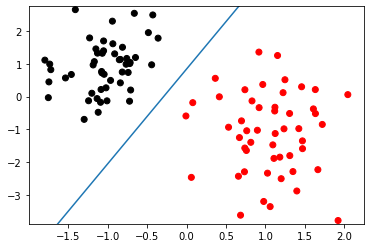

In [7]:
n = 100
X, y = make_classification(random_state=8,
                           n_samples=n,
                           n_features=2, 
                           n_redundant=0, 
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=2)
y[y == 0] = -1
C = 1

w = cvx.Variable(2)
b = cvx.Variable()
xi = cvx.Variable(n)

obj = cvx.Minimize( cvx.sum_squares(w) / 2 + C * cvx.sum(xi) )
constraint = [xi >= 0] + [(xi[i] >= 1 - y[i]*(w@X[i]+b)) for i in range(n)]
# OKな例：要素ごとの積
# constraint = [xi >= 0, xi >= 1 - cvx.multiply(y, X@w+b)]
# NGな例：ベクトル同士の内積
# constraint = [xi >= 0, xi >= 1 - y*(X@w+b)]
# https://www.cvxpy.org/tutorial/functions/index.html?highlight=elementwise

prob = cvx.Problem(obj, constraint)
prob.solve(verbose=True)

plt.scatter(X[:,0], X[:,1], c=y, cmap="flag")

x1=np.array([X[:,0].min(),X[:,0].max()])
x2=(-b.value-w.value[0]*x1)/w.value[1]
plt.plot(x1,x2)
plt.ylim([X[:,1].min()-0.1,X[:,1].max()+0.1])
plt.savefig("svm.pdf")